**QUESTION NUMBER 2**

In [ ]:


import random

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



In [ ]:


data = pd.read_csv("onlinefoods.csv")



In [ ]:

data.head()



,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [ ]:


data.shape



(388, 13)

In [ ]:
data.drop("Unnamed: 12",axis=1,inplace=True)

In [ ]:
data[['Age','Family size']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,388.0,24.628866,2.975593,18.0,23.0,24.0,26.0,33.0
Family size,388.0,3.280928,1.351025,1.0,2.0,3.0,4.0,6.0


In [ ]:
data.nunique()

Age                           16
Gender                         2
Marital Status                 3
Occupation                     4
Monthly Income                 5
Educational Qualifications     5
Family size                    6
latitude                      77
longitude                     76
Pin code                      77
Output                         2
Feedback                       2
dtype: int64

In [ ]:
data.replace({"Single":0},inplace=True)
data.replace({"Married":1},inplace=True)
data.replace({"Prefer not to say":None},inplace=True)

In [ ]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,0,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,0,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,0,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,0,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,0,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [ ]:
data["Marital Status"].unique()

array([0, 1, None], dtype=object)

In [ ]:
data['Occupation'].unique()


array(['Student', 'Employee', 'Self Employeed', 'House wife'],
      dtype=object)

In [ ]:


data['Monthly Income'].unique()



array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [ ]:


data["Monthly Income"].replace({"No Income":0},inplace=True)
data["Monthly Income"].replace({"Below Rs.10000":5000},inplace=True)
data["Monthly Income"].replace({"10001 to 25000":17500},inplace=True)
data["Monthly Income"].replace({"25001 to 50000":37500},inplace=True)
data["Monthly Income"].replace({"More than 50000":50000},inplace=True)



In [ ]:
data['Monthly Income'].unique()

array([    0,  5000, 50000, 17500, 37500])

In [ ]:
data['Educational Qualifications'].unique()

array(['Post Graduate', 'Graduate', 'Ph.D', 'Uneducated', 'School'],
      dtype=object)

In [ ]:


data["Educational Qualifications"].replace({"Uneducated":0},inplace=True)
data["Educational Qualifications"].replace({"School":1},inplace=True)
data["Educational Qualifications"].replace({"Graduate":2},inplace=True)
data["Educational Qualifications"].replace({"Post Graduate":3},inplace=True)
data["Educational Qualifications"].replace({"Ph.D":4},inplace=True)



In [ ]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [ ]:
data['Output'] = LabelEncoder().fit_transform(data['Output'])

In [ ]:
data['Feedback'] = LabelEncoder().fit_transform(data['Feedback'])

In [ ]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,0,Student,0,3,4,12.9766,77.5993,560001,1,1
1,24,0,0,Student,5000,2,3,12.9770,77.5773,560009,1,1
2,22,1,0,Student,5000,3,3,12.9551,77.6593,560017,1,0
3,22,0,0,Student,0,2,6,12.9473,77.5616,560019,1,1
4,22,1,0,Student,5000,3,4,12.9850,77.5533,560010,1,1


In [ ]:
data["is working"] = None

In [26]:


data.loc[data["Occupation"] == "Student"         ,"is working"] = 0
data.loc[data["Occupation"] == "Self Employeed"  ,"is working"] = 1
data.loc[data["Occupation"] == "Employee"        ,"is working"] = 1
data.loc[data["Occupation"] == "House wife"      ,"is working"] = 0



In [27]:


data["is working"].unique()



array([0, 1], dtype=object)

In [28]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working
0,20,0,0,Student,0,3,4,12.9766,77.5993,560001,1,1,0
1,24,0,0,Student,5000,2,3,12.9770,77.5773,560009,1,1,0
2,22,1,0,Student,5000,3,3,12.9551,77.6593,560017,1,0,0
3,22,0,0,Student,0,2,6,12.9473,77.5616,560019,1,1,0
4,22,1,0,Student,5000,3,4,12.9850,77.5533,560010,1,1,0


In [29]:
one_enc_df = pd.DataFrame(OneHotEncoder().fit_transform(pd.DataFrame(data["Occupation"])).toarray())
data = pd.concat([data,one_enc_df],axis=1)

In [30]:
data[data["Occupation"] == "Student"].head(1)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,0,1,2,3
0,20,0,0,Student,0,3,4,12.9766,77.5993,560001,1,1,0,0.0,0.0,0.0,1.0


In [31]:
data[data["Occupation"] == "House wife"].head(1)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,0,1,2,3
37,32,0,None,House wife,0,2,5,12.982,77.6256,560008,1,0,0,0.0,1.0,0.0,0.0


In [32]:


data[data["Occupation"] == "Employee"].head(1)



,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,0,1,2,3
5,27,0,1,Employee,50000,3,2,12.9299,77.6848,560103,1,1,1,1.0,0.0,0.0,0.0


In [33]:


data[data["Occupation"] == "Self Employeed"].head(1)



,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,0,1,2,3
14,23,0,0,Self Employeed,17500,3,5,12.9438,77.5738,560004,1,1,1,0.0,0.0,1.0,0.0


In [34]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,0,1,2,3
0,20,0,0,Student,0,3,4,12.9766,77.5993,560001,1,1,0,0.0,0.0,0.0,1.0
1,24,0,0,Student,5000,2,3,12.9770,77.5773,560009,1,1,0,0.0,0.0,0.0,1.0
2,22,1,0,Student,5000,3,3,12.9551,77.6593,560017,1,0,0,0.0,0.0,0.0,1.0
3,22,0,0,Student,0,2,6,12.9473,77.5616,560019,1,1,0,0.0,0.0,0.0,1.0
4,22,1,0,Student,5000,3,4,12.9850,77.5533,560010,1,1,0,0.0,0.0,0.0,1.0


In [35]:
data.rename(columns={
                     1:"is House wife",
                     0:"is Employee",
                     2:"is Self Employeed",
                     3:"is Student"} ,inplace=True)

In [36]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,is Employee,is House wife,is Self Employeed,is Student
0,20,0,0,Student,0,3,4,12.9766,77.5993,560001,1,1,0,0.0,0.0,0.0,1.0
1,24,0,0,Student,5000,2,3,12.9770,77.5773,560009,1,1,0,0.0,0.0,0.0,1.0
2,22,1,0,Student,5000,3,3,12.9551,77.6593,560017,1,0,0,0.0,0.0,0.0,1.0
3,22,0,0,Student,0,2,6,12.9473,77.5616,560019,1,1,0,0.0,0.0,0.0,1.0
4,22,1,0,Student,5000,3,4,12.9850,77.5533,560010,1,1,0,0.0,0.0,0.0,1.0


In [37]:
data.drop(columns=["Occupation"],inplace=True)

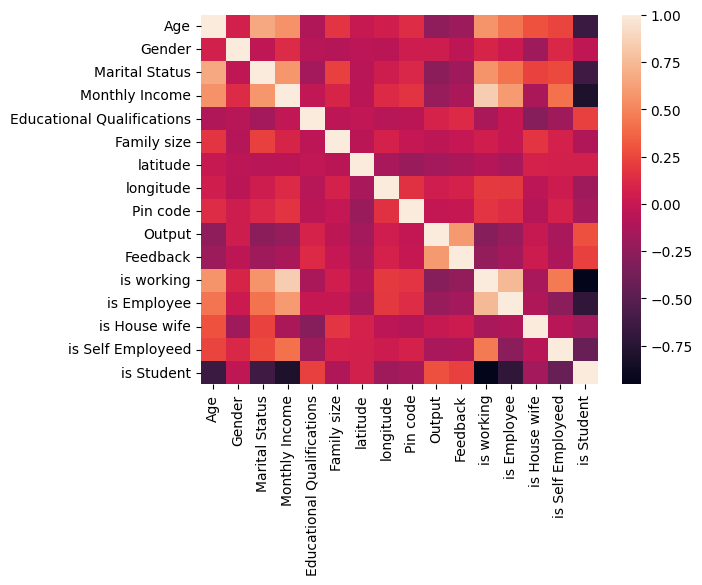

<Figure size 1000x800 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt
from seaborn import heatmap
heatmap(data.corr(),annot=False)
plt.figure(figsize=(10,8))
plt.show()


In [39]:
data.isna().sum()

Age                            0
Gender                         0
Marital Status                12
Monthly Income                 0
Educational Qualifications     0
Family size                    0
latitude                       0
longitude                      0
Pin code                       0
Output                         0
Feedback                       0
is working                     0
is Employee                    0
is House wife                  0
is Self Employeed              0
is Student                     0
dtype: int64

In [40]:
data['Marital Status'].fillna(random.randint(0,1),inplace=True)

In [41]:
data["Marital Status"].isna().sum()

0

In [42]:
X= data.drop(columns=["Output"])
y= data["Output"]


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.12)


**KNN**

In [133]:


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [134]:
knn.score(X_train,y_train)

0.8240469208211144

In [135]:


knn.score(X_test,y_test)



0.7446808510638298

In [136]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7446808510638298


Accuracy: 0.7446808510638298


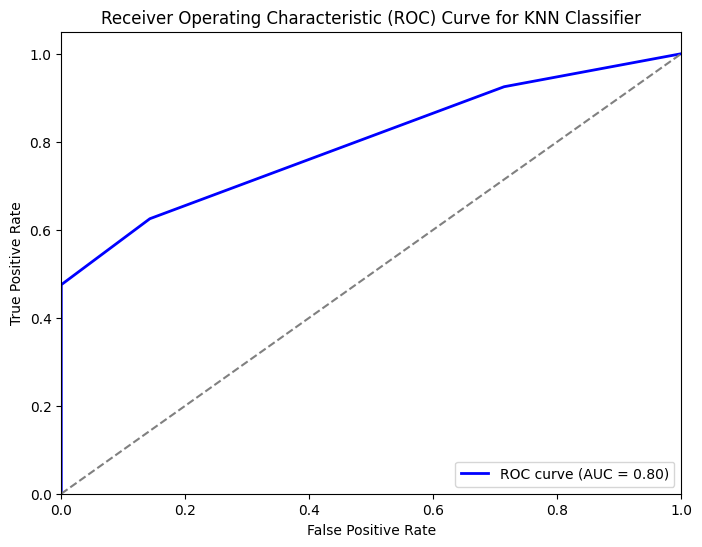

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_score = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN Classifier')
plt.legend(loc='lower right')
plt.show()


**SVM**

In [161]:


from sklearn.svm import SVC
svm = SVC()
svm = SVC(probability=True)
svm.fit(X_train, y_train)



SVC(probability=True)

In [162]:


svm.score(X_train,y_train)



0.7653958944281525

In [163]:


svm.score(X_test,y_test)



0.851063829787234

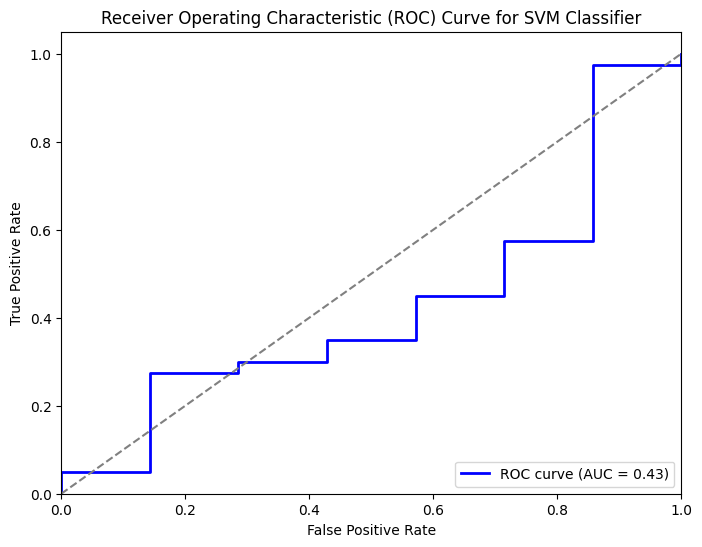

In [164]:
y_score = svm.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM Classifier')
plt.legend(loc='lower right')
plt.show()

**NAIVE BAYES**

In [146]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)




GaussianNB()

In [147]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8297872340425532


In [148]:
model.score(X_train,y_train)


0.7712609970674487

In [149]:
model.score(X_test,y_test)

0.8297872340425532

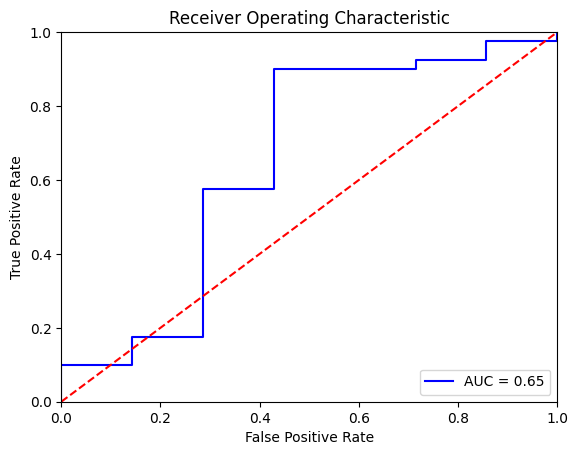

In [150]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**LOGISTIC REGRESSION**

In [151]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [165]:
y_pred = logr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.851063829787234


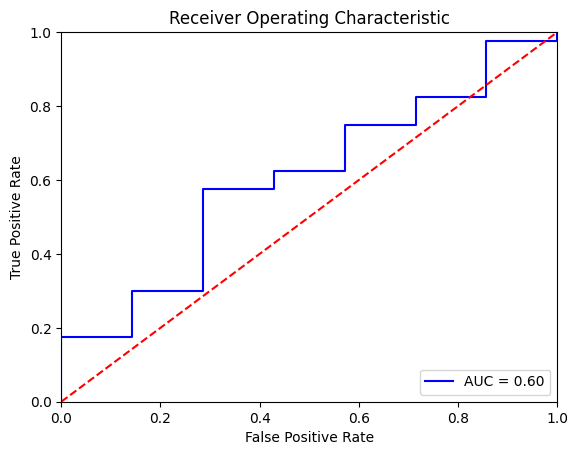

In [166]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

MLP

In [170]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MLP Classifier with default parameters
mlp = MLPClassifier(random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predict on test data
y_pred = mlp.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("MLP Accuracy:", accuracy)


MLP Accuracy: 0.782051282051282


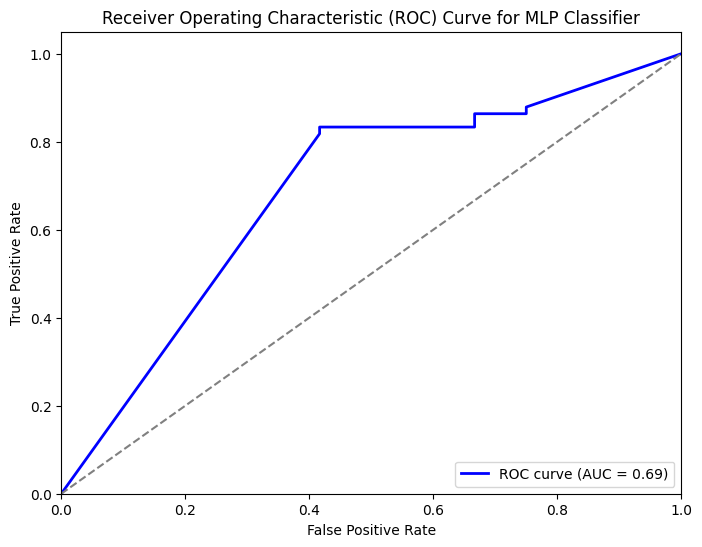

In [172]:
y_prob = mlp.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLP Classifier')
plt.legend(loc='lower right')
plt.show()


**PLA**

In [202]:
# Import the necessary library
import numpy as np

# Build the Perceptron Model
class Perceptron:

	def __init__(self, num_inputs, learning_rate=0.01):
		# Initialize the weight and learning rate
		self.weights = np.random.rand(num_inputs + 1)
		self.learning_rate = learning_rate

	# Define the first linear layer
	def linear(self, inputs):
		Z = inputs @ self.weights[1:].T + + self.weights[0]
		return Z

	# Define the Heaviside Step function.
	def Heaviside_step_fn(self, z):
		if z >= 0:
			return 1
		else:
			return 0

	# Define the Prediction
	def predict(self, inputs):
		Z = self.linear(inputs)
		try:
			pred = []
			for z in Z:
				pred.append(self.Heaviside_step_fn(z))
		except:
			return self.Heaviside_step_fn(Z)
		return pred

	# Define the Loss function
	def loss(self, prediction, target):
		loss = (prediction-target)
		return loss

	#Define training
	def train(self, inputs, target):
		prediction = self.predict(inputs)
		error = self.loss(prediction, target)
		self.weights[1:] += self.learning_rate * error * inputs
		self.weights[0] += self.learning_rate * error

	# Fit the model
	def fit(self, X, y, num_epochs):
		for epoch in range(num_epochs):
			for inputs, target in zip(X, y):
				self.train(inputs, target)


In [204]:
perceptron = Perceptron(num_inputs=X_train.shape[1])
perceptron.fit(X_train, y_train, num_epochs=10)

pla_y_pred = pred = perceptron.predict(X_test)

UFuncTypeError: ufunc 'matmul' did not contain a loop with signature matching types (dtype('<U3'), dtype('float64')) -> None

**K MEANS CLUSTERING**

In [200]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,homogeneity_score,completeness_score


model = KMeans(n_clusters=3)
y_pred = model.fit_predict(X)

X['train_predict'] = y_pred

wcss = model.inertia_
print("Within-Cluster Sum of Squares (WCSS):", wcss)
klabels = model.labels_
silhouette=silhouette_score(X,klabels)
print("Silhouette Score ",silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Within-Cluster Sum of Squares (WCSS): 5654247737.903276
Silhouette Score  0.873896865113206


Silhouette score closer to 1 is better
